# **Exploring Producer Type Trends**

Remember that the Producer types in this dataset are EU(Electric Utilities) and IPP(Independent Power Producers)
- **Electric Utilities** are the traditional, vertically integrated power companies, such as Dominion Energy, that own and operate large power plants and are responsible for meeting statewide demand. These utilities are regulated and typically oversee the core grid infrastructure.
- **Independent Power Producers**, on the other hand, are private companies that generate electricity but do not own the transmission or distribution grid. In Virginia, many natural gas and renewable facilities fall into this category, and they sell their power into the PJM wholesale market rather than directly serving retail customers.

In [47]:
# import packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [79]:
#load the data 
data = pd.read_csv("va_electricity_capability.csv")
data.head()

,period,stateId,stateDescription,producertypeid,producerTypeDescription,energysourceid,energySourceDescription,capability,capability-units
0,2024,VA,Virginia,EU,Electric Utilities,ALL,All,21256.2,megawatts
1,2024,VA,Virginia,EU,Electric Utilities,BAT,Battery,60.0,megawatts
2,2024,VA,Virginia,EU,Electric Utilities,COL,Coal,1487.1,megawatts
3,2024,VA,Virginia,EU,Electric Utilities,HPS,Pumped Storage,3253.1,megawatts
4,2024,VA,Virginia,EU,Electric Utilities,HYC,Hydroelectric,821.6,megawatts


<Figure size 1400x600 with 0 Axes>

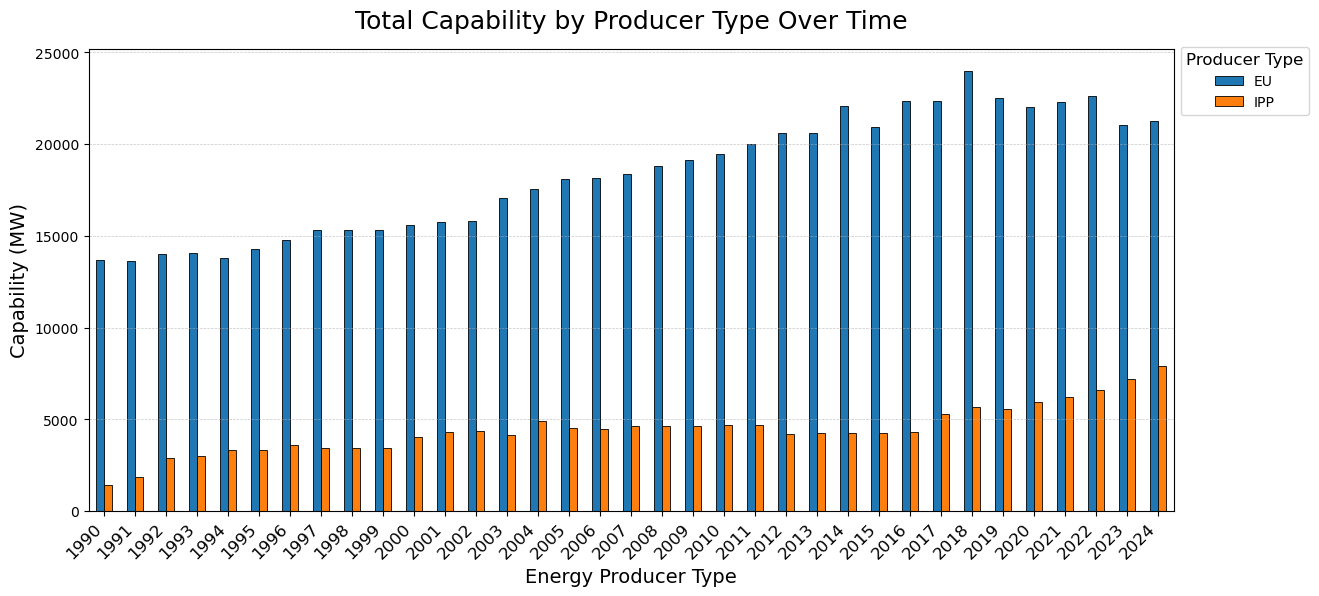

In [49]:
mask = ['EU','IPP']
tot_data = data[(data['energysourceid'] == 'ALL') & (data["producertypeid"].isin(mask))]

grouped_tot_data = tot_data.groupby(["producertypeid", "period"])['capability'].sum().unstack()

plt.figure(figsize=(14, 6))

ax = grouped_tot_data.T.plot(kind='bar',figsize=(14, 6),edgecolor='black',linewidth=0.6)

# Titles, labels, formatting
ax.set_title("Total Capability by Producer Type Over Time", fontsize=18, pad=15)
ax.set_xlabel("Energy Producer Type", fontsize=14)
ax.set_ylabel("Capability (MW)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title="Producer Type",title_fontsize=12,fontsize=10,loc='upper left', bbox_to_anchor=(1.0, 1.02))
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)


This is an interesting bar chart. We can see that EUs are clearly the predominant product type throughout the years, but in recent years, we have seen growth in IPPs, especially after 2017. 

**Now let's look at IPPs and EU diffenrences in energy source capability**

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


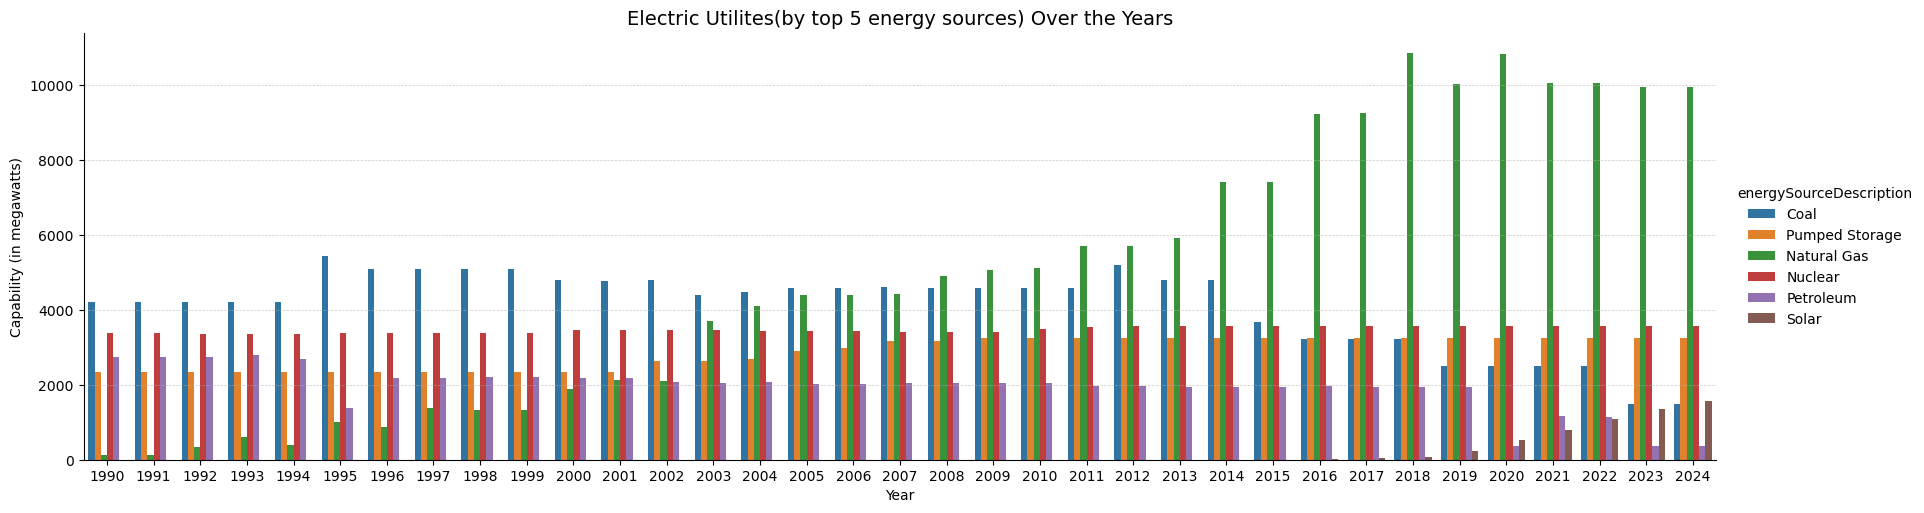

In [78]:
mask = ['Coal','Pumped Storage','Natural Gas','Nuclear','Petroleum', 'Solar']
EU_top = data[(data['energySourceDescription'].isin(mask)) & (data["producertypeid"] == "EU")]

# Let's make a bar plot using seaborn's catplot 
sns.catplot(EU_top, kind = 'bar', x='period', y='capability', hue = 'energySourceDescription', aspect = 3.5)

#formatting and labels
plt.title("Electric Utilites(by top 5 energy sources) Over the Years", fontsize = 14)
plt.xlabel("Year",)
plt.ylabel("Capability (in megawatts)")
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

This is an interesting grouped bar chart. The bar chart makes it immediately clear how differently each fuel type has contributed to Virginia’s electric utility capacity over time. Coal shows a steady decline, reflecting the broader shift away from traditional baseload fossil fuels, while natural gas surges upward and becomes the dominant source in later years. Nuclear remains stable, acting as a consistent backbone of the system, and solar begins to appear more meaningfully only in recent years, highlighting its rapid growth from a small base

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


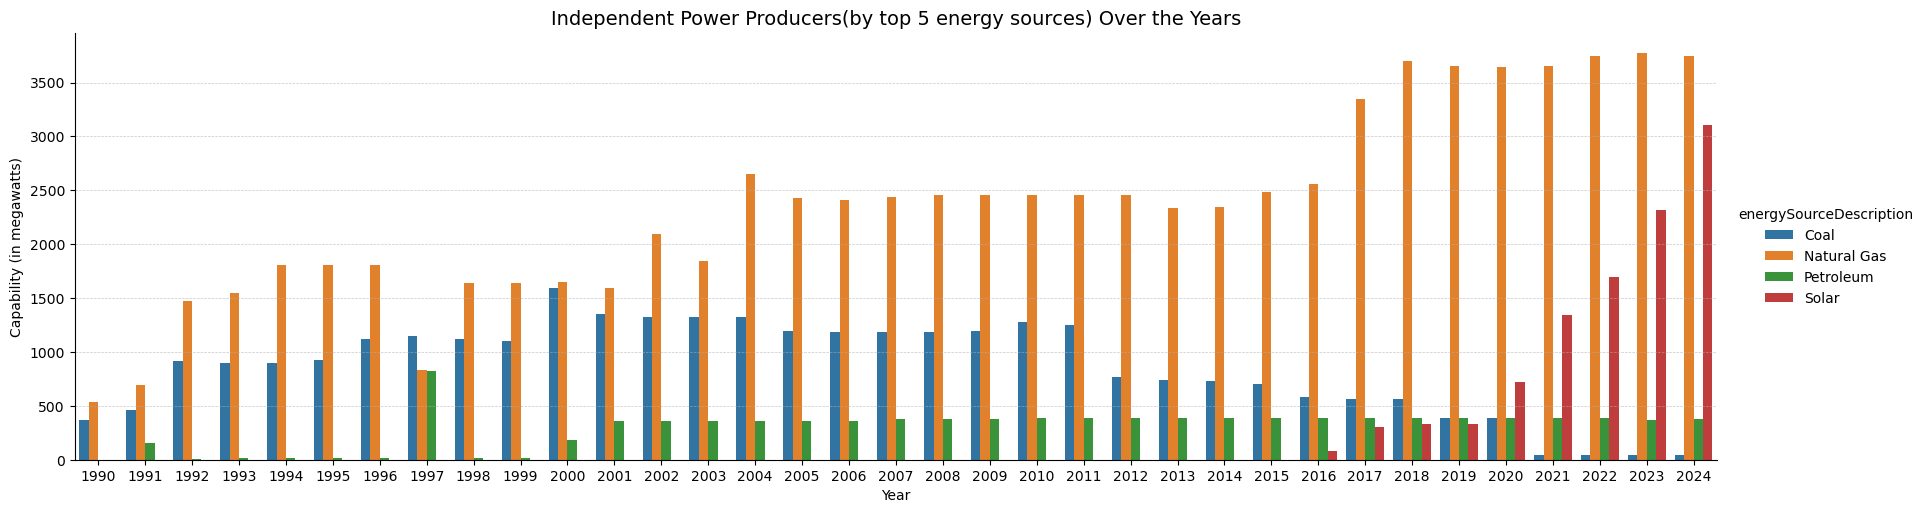

In [52]:
mask = ['Coal','Pumped Stroage','Natural Gas','Nuclear','Petroleum', 'Solar']
IPP_top = data[(data['energySourceDescription'].isin(mask)) & (data["producertypeid"] == "IPP")]

# Let's make a bar plot using seaborn's catplot 
sns.catplot(IPP_top, kind = 'bar', x='period', y='capability', hue = 'energySourceDescription', aspect = 3.5)

#formatting and labels
plt.title("Independent Power Producers(by top 5 energy sources) Over the Years", fontsize = 14)
plt.xlabel("Year",)
plt.ylabel("Capability (in megawatts)")
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

The trends in this chart show that natural gas dominates IPP capability and steadily grows over time, reinforcing its role as the primary fuel for independent generators in Virginia. Coal and petroleum remain very low and show no significant upward movement, reflecting their declining relevance in the IPP sector. Solar displays a clear upward trend, indicating a meaningful growth in renewable IPP capacity. Meanwhile, pumped storage and nuclear stay relatively stable. 

**The Recent Solar Growth vs Producer Type**

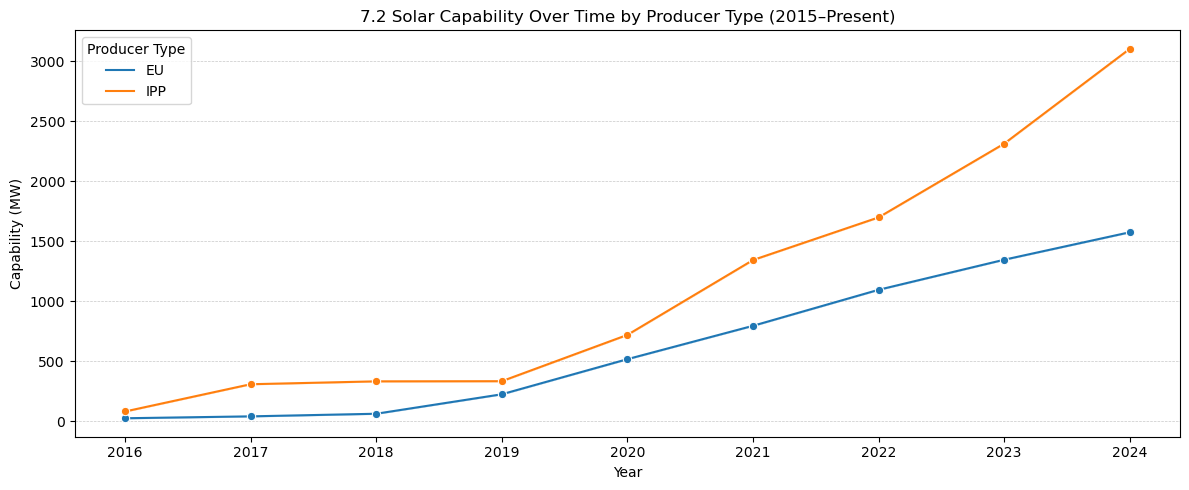

In [55]:
# Filter for solar and producer types
solar_mask = data["energySourceDescription"].str.contains("Solar", case=False)

solar_by_type = data[solar_mask & data["producertypeid"].isin(["EU", "IPP"]) & (data["period"] >= 2015)]

plt.figure(figsize=(12, 5))
sns.lineplot(
    data=solar_by_type,
    x="period",
    y="capability",
    hue="producertypeid",
    marker="o"
)

plt.title("7.2 Solar Capability Over Time by Producer Type (2015–Present)")
plt.xlabel("Year")
plt.ylabel("Capability (MW)")
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(title="Producer Type")
plt.tight_layout()
plt.show()

**Nuclear and Pump storage stability after 2009**

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

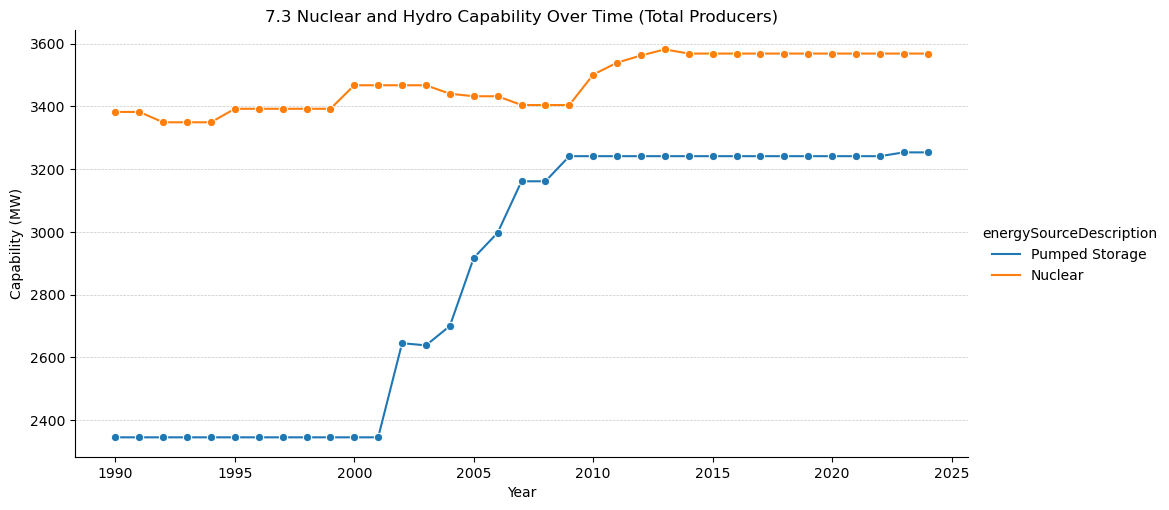

In [61]:
nh_mask = (data["energySourceDescription"] == "Nuclear") | (data["energySourceDescription"] == "Pumped Storage" )

# Use total producer type to show overall stability
nh_tot = data[nh_mask & (data["producertypeid"] == "TOT")]

plt.figure(figsize=(12, 5))
sns.relplot(nh_tot, kind='line',  x="period", y="capability", hue="energySourceDescription",marker="o", aspect = 2)

plt.title("7.3 Nuclear and Hydro Capability Over Time (Total Producers)")
plt.xlabel("Year")
plt.ylabel("Capability (MW)")
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

**Also the Nuclear and Pure Hydro capability stability over the years**

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

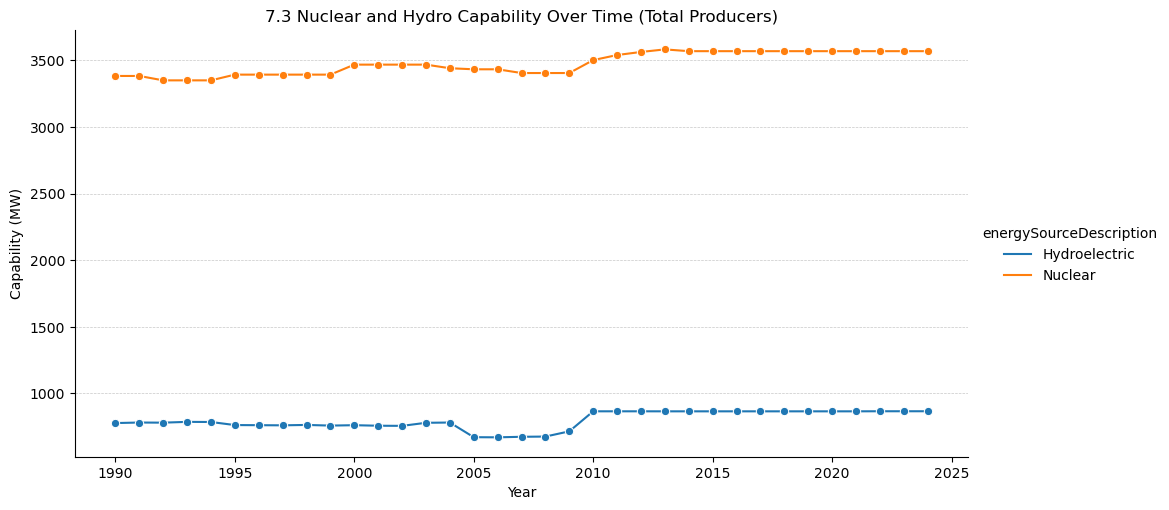

In [62]:
nh_mask = (data["energySourceDescription"] == "Nuclear") | (data["energySourceDescription"] == "Hydroelectric" )

# Use total producer type to show overall stability
nh_tot = data[nh_mask & (data["producertypeid"] == "TOT")]

plt.figure(figsize=(12, 5))
sns.relplot(nh_tot, kind='line',  x="period", y="capability", hue="energySourceDescription",marker="o", aspect = 2)

plt.title("7.3 Nuclear and Hydro Capability Over Time (Total Producers)")
plt.xlabel("Year")
plt.ylabel("Capability (MW)")
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

Nuclear, Pump, and Hydroelectric capabilities have all been stable over the years, showing limited growth in these electric capability resources. 

## Structural Break by Producer Type

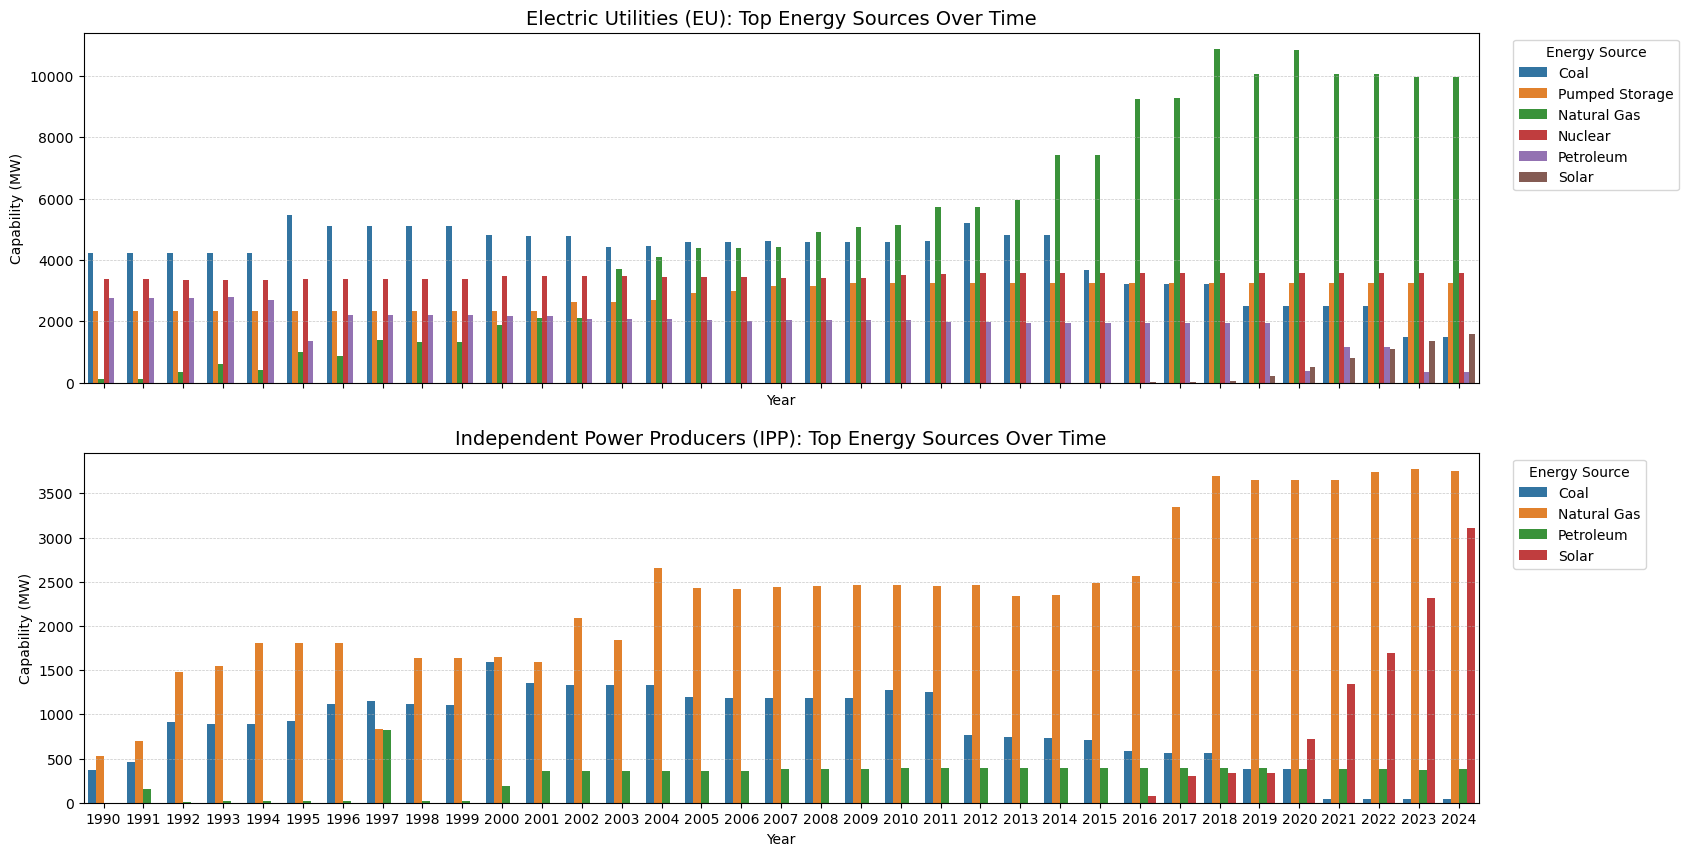

In [77]:
mask = ['Coal','Pumped Storage','Natural Gas','Nuclear','Petroleum', 'Solar']

EU_top = data[(data['energySourceDescription'].isin(mask)) & (data["producertypeid"] == "EU")]
IPP_top = data[(data['energySourceDescription'].isin(mask)) & (data["producertypeid"] == "IPP")]

fig, axes = plt.subplots(2, 1, figsize=(18, 10), sharex=True)


sns.barplot(EU_top, x= "period", y= "capability", hue="energySourceDescription", ax=axes[0])

axes[0].set_title("Electric Utilities (EU): Top Energy Sources Over Time", fontsize=14)
axes[0].set_xlabel('Year')
axes[0].set_ylabel("Capability (MW)")
axes[0].grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)


sns.barplot(IPP_top, x="period", y="capability", hue="energySourceDescription",ax=axes[1])

axes[1].set_title("Independent Power Producers (IPP): Top Energy Sources Over Time", fontsize=14)
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Capability (MW)")
axes[1].grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

# adjust legend so it doesn’t double
axes[0].legend(title="Energy Source", bbox_to_anchor=(1.02, 1))
axes[1].legend(title="Energy Source", bbox_to_anchor=(1.02, 1))


Now, with the producer type stacked on top, we can clearly see that from 2016 to the present, there was a massive boom in natural gas capability. And we can also see that IPPs have had significant growth within the solar capability industry. 